In [5]:
import pandas as pd
df = pd.read_csv('C:/Users/mctovar/Documents/GitHub/proyecto-camitov14/data_lake/business/precios-diarios.csv')

In [6]:
df.info

<bound method DataFrame.info of            fecha  hora      precio
0     1997-01-01  11.5   24.194228
1     1997-01-02  11.5   23.417937
2     1997-01-03  11.5   21.348312
3     1997-01-04  11.5   16.795228
4     1997-01-05  11.5   15.358270
...          ...   ...         ...
8881  2021-04-26  11.5  188.325833
8882  2021-04-27  11.5  181.770000
8883  2021-04-28  11.5  175.874167
8884  2021-04-29  11.5  165.203333
8885  2021-04-30  11.5  144.489167

[8886 rows x 3 columns]>

In [7]:
df['fecha'] = pd.to_datetime(df['fecha'], format='%Y-%m-%d')
df['weekday'] = df.fecha.dt.weekday 
df

,fecha,hora,precio,weekday
0,1997-01-01,11.5,24.194228,2
1,1997-01-02,11.5,23.417937,3
2,1997-01-03,11.5,21.348312,4
3,1997-01-04,11.5,16.795228,5
4,1997-01-05,11.5,15.358270,6
...,...,...,...,...
8881,2021-04-26,11.5,188.325833,0
8882,2021-04-27,11.5,181.770000,1
8883,2021-04-28,11.5,175.874167,2
8884,2021-04-29,11.5,165.203333,3


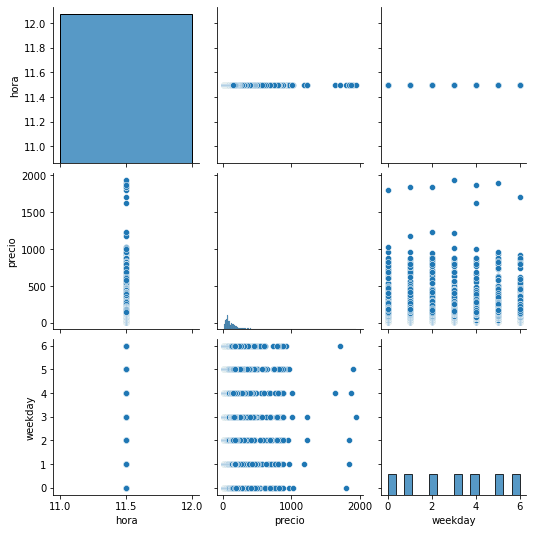

In [8]:
import seaborn as sns

sns.pairplot(df)

In [9]:
#Se puede observar en los gráficos anteriores que el precio por día va de 0 a 1000 con algunos valores atípicos

In [10]:
from sklearn.model_selection import train_test_split
import numpy as np

X = np.array(df['weekday']).reshape(-1,1)
y = np.array(df['precio']).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=500
)
print (X.shape)
print (y.shape)

(8886, 1)
(8886, 1)


In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

X_train, y_train = make_regression(n_features=1)
regr = RandomForestRegressor()
regr.fit(X_train, y_train)


RandomForestRegressor()

In [12]:
import pickle
model = regr.fit(X_train, y_train)
pickle.dump(model, open("precios-diarios.pkl", "wb"))

In [13]:
with open('precios-diarios.pkl' , 'rb') as f:
    lr = pickle.load(f)

In [14]:
pi_y_pred = lr.predict(y_test)

In [15]:
pi_y_pred

array([159.46008727, 159.46008727, 159.46008727, ..., 159.46008727,
       159.46008727, 159.46008727])

In [16]:

y_pred = regr.predict(X_test)
print("R^2: {:6.4f}".format(regr.score(X_test, y_test)))


R^2: -0.2230


[]

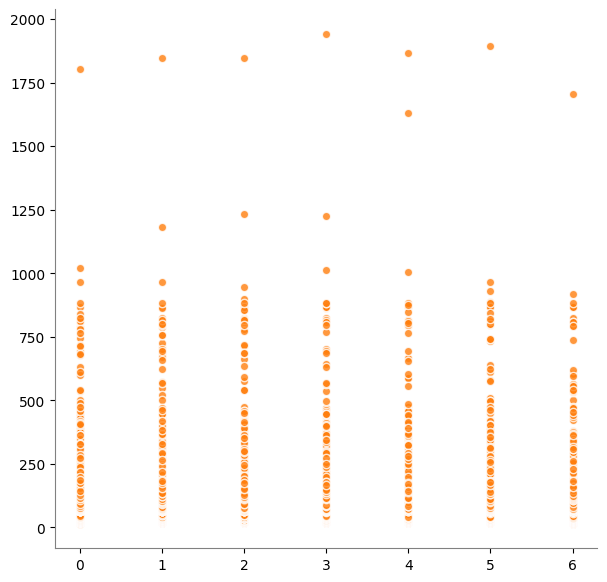

In [17]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

day = df['weekday']
precio = df['precio']

plt.figure(figsize=(7, 7))
plt.scatter(day, precio, color="tab:orange", alpha=0.8, edgecolors="white")
plt.gca().spines["left"].set_color("gray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.plot()

[]

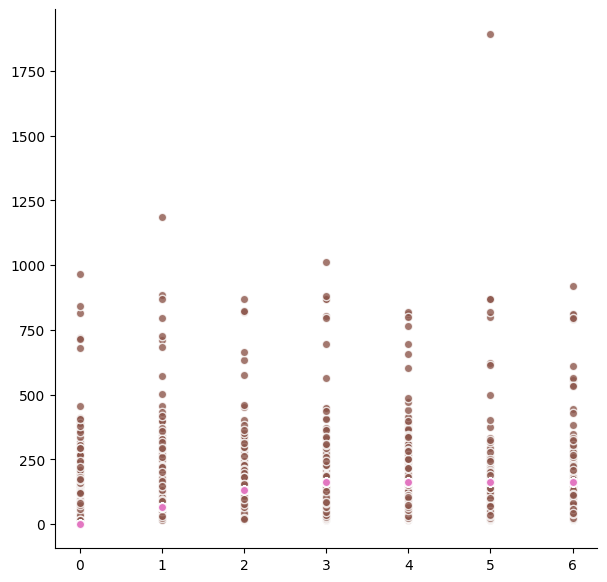

In [18]:
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
plt.figure(figsize=(7, 7))

plt.scatter(X_test, y_test, color="tab:brown", alpha=0.8, edgecolors="white")
plt.scatter(X_test, y_pred, color="tab:pink", alpha=0.8, edgecolors="white")
plt.gca().spines["left"].set_color("black")
plt.gca().spines["bottom"].set_color("black")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.plot()